In [1]:
import joblib
import json
import pandas
import numpy
import seaborn

import sklearn.model_selection
import sklearn.neural_network
import sklearn.metrics

import matplotlib.pyplot
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Instructions

- Read **the train data** from the CSV file and properly set the index


In [2]:
data_train = pandas.read_csv('./data/features.train.csv').set_index('id')
data_train

,duration,credit_amount,age,employment,own_telephone,foreign_worker,installment_commitment,residence_since,existing_credits,num_dependents,...,property_magnitude_life insurance,property_magnitude_car,property_magnitude_real estate,other_payment_plans_none,other_payment_plans_stores,other_payment_plans_bank,housing_for free,housing_rent,housing_own,label
id,,,,,,,,,,,,,,,,,,,,,
253,0.277814,0.320904,-0.080669,2.0,0.0,1.0,1.0,2.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
667,2.289342,0.130313,-0.765274,2.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
85,-0.727949,-0.642249,-0.594123,2.0,1.0,1.0,3.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
969,-0.811763,0.246356,0.347209,2.0,0.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
75,-0.727949,-0.602162,2.572174,4.0,0.0,1.0,3.0,3.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,-0.727949,-0.758292,1.031813,2.0,0.0,1.0,3.0,3.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
192,0.529255,0.237916,0.004906,2.0,1.0,1.0,3.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
629,-0.979390,0.208730,2.401022,4.0,0.0,1.0,0.0,3.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# Instructions

- Split the data into a train data set and a validation data set using `sklearn.model_selection.train_test_split` with the following configurations:
```
    train_size   = 0.75
    shuffle      = True 
    random_state = 0
```


,duration,credit_amount,age,employment,own_telephone,foreign_worker,installment_commitment,residence_since,existing_credits,num_dependents,...,property_magnitude_life insurance,property_magnitude_car,property_magnitude_real estate,other_payment_plans_none,other_payment_plans_stores,other_payment_plans_bank,housing_for free,housing_rent,housing_own,label
id,,,,,,,,,,,,,,,,,,,,,
29,3.295105,1.265069,2.315447,4.0,1.0,1.0,2.0,3.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
439,-0.727949,-0.924619,-0.850849,1.0,0.0,1.0,3.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
130,2.289342,1.845633,-1.022001,3.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
503,0.277814,-0.711171,0.176057,1.0,0.0,1.0,3.0,3.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
649,-0.727949,-0.898246,0.347209,2.0,0.0,1.0,3.0,3.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,-0.727949,-0.696402,-1.193152,1.0,0.0,1.0,1.0,3.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
950,-0.225068,0.123632,0.347209,0.0,1.0,1.0,2.0,2.0,2.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
256,0.277814,-0.194958,-0.080669,2.0,0.0,1.0,3.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


,duration,credit_amount,age,employment,own_telephone,foreign_worker,installment_commitment,residence_since,existing_credits,num_dependents,...,property_magnitude_life insurance,property_magnitude_car,property_magnitude_real estate,other_payment_plans_none,other_payment_plans_stores,other_payment_plans_bank,housing_for free,housing_rent,housing_own,label
id,,,,,,,,,,,,,,,,,,,,,
645,1.283578,1.667350,-0.765274,1.0,1.0,1.0,3.0,3.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
402,0.277814,1.902248,-0.765274,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
758,0.277814,-0.648930,-0.422972,2.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
330,0.277814,1.187356,3.342354,0.0,1.0,1.0,1.0,3.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
110,-1.230831,-0.629238,-0.422972,4.0,0.0,1.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,-0.225068,1.454254,0.347209,0.0,1.0,1.0,3.0,3.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
557,0.026373,0.620505,-0.594123,2.0,1.0,1.0,0.0,3.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
778,1.283578,0.869469,0.176057,4.0,1.0,1.0,3.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


# Instructions

- Instantiate a `sklearn.neural_network.MLPClassifier` model with the following configurations
```
    hidden_layer_sizes    = (20, 10),
    solver                = 'sgd', 
    activation            = 'logistic',
    alpha                 = 0.0,  
    batch_size            = 32,
    learning_rate         = 'constant',
    learning_rate_init    = 0.1,
    max_iter              = 1000,
    momentum              = 0.0, 
    nesterovs_momentum    = False, 
    validation_fraction   = 0.0, 
    shuffle               = True,
    random_state          = 0
```


# Instructions

- This part is to train the model while recording the losses and scores of both training and validation data sets
  - For each training iteration, use `partial_fit` to fit the model with the training data
  - Save the model that has the minimum validation loss
- Extend the following code base to append various metrics from partially trained models to `training_results`

```
data_train_features      = data_train.drop(['label'], axis='columns')
data_train_labels        = data_train['label']

data_validation_features = data_validation.drop(['label'], axis='columns')
data_validation_labels   = data_validation['label']

best_nll_validation = numpy.inf
training_results = []

for i in range(1, 400):

    model.partial_fit(
        X       = data_train_features,
        y       = data_train_labels,
        classes = [0, 1]
    )
    
    # insert code here
    nll_train = ...
    f1_train = ...
    nll_validation = ...
    f1_validation = ...

    training_results.append({
        'iter'            : i,
        'nll_train'       : nll_train,
        'f1_train'        : f1_train,
        'nll_validation'  : nll_validation,
        'f1_validation'   : f1_validation,
    })
        
    if nll_validation < best_nll_validation:
        best_nll_validation = nll_validation
        joblib.dump(model, './model/model.joblib')
        

training_results = pandas.DataFrame(training_results).set_index('iter')

```

,nll_train,f1_train,nll_validation,f1_validation
iter,,,,
1,0.624052,0.000000,0.587690,0.000000
2,0.622943,0.000000,0.583528,0.000000
3,0.622737,0.000000,0.582791,0.000000
4,0.622619,0.000000,0.582594,0.000000
5,0.622513,0.000000,0.582491,0.000000
...,...,...,...,...
395,0.378367,0.724719,0.537192,0.532110
396,0.377828,0.724719,0.537654,0.532110
397,0.377285,0.724719,0.538119,0.532110


# Instructions

- Plot the `nll_train` and `nll_validation` against `iter`
- Plot the `f1_train` and `f1_validation` against `iter`
- Find the training iteration that achieves the minimum validation loss
  - Hint: use `.idxmin` on `nll_validation`
- Also, use `.get_params`, `json.dump` to save the model configuration to  `./model/config.json`


<Axes: xlabel='iter', ylabel='nll_train'>

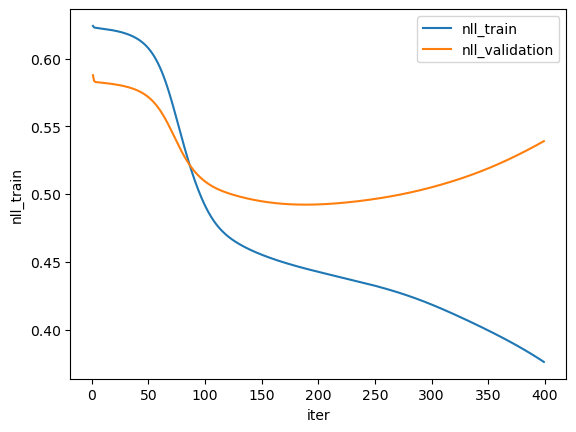

<Axes: xlabel='iter', ylabel='f1_train'>

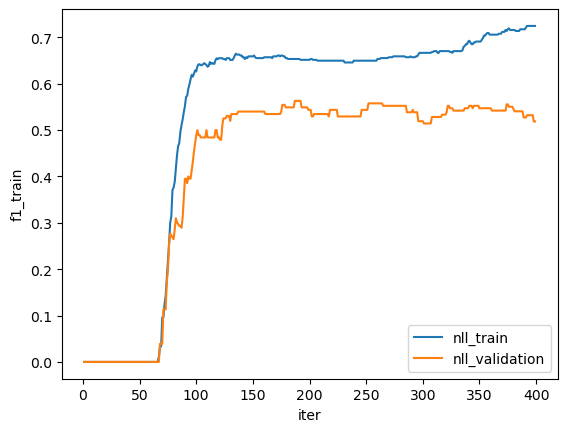

189

,nll_train,f1_train,nll_validation,f1_validation
iter,,,,
185,0.445841,0.653409,0.492222,0.549020
186,0.445617,0.653409,0.492213,0.549020
187,0.445394,0.653409,0.492207,0.563107
188,0.445172,0.653409,0.492204,0.563107
189,0.444952,0.653409,0.492204,0.563107
190,0.444734,0.653409,0.492207,0.563107
191,0.444517,0.653409,0.492212,0.563107
192,0.444301,0.651558,0.492221,0.563107
193,0.444086,0.651558,0.492232,0.549020
